# READ ME
## 1. you may also access the data through the following link:
https://fsstudentsde-my.sharepoint.com/:f:/g/personal/chenyue_jiang_fs-students_de/Eu3WI9hotHREuOgpXI4hdl0B0PSnsQWR22xC5mh5APx8mA?e=0MG1zT
 - baaq9x9kji9zwaqg.csv (price data)
 - ubnticojazavbiyb.csv (ratio)
 - SP500_Index_Constitutes2020.csv (s&p500)

In [145]:
import wrds as wrds
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tqdm import tqdm

In [3]:
import warnings

warnings.filterwarnings("ignore")
# warnings.resetwarnings()

# Read data

In [45]:
import platform
from pathlib import Path
my_system = platform.uname()
print(f'My PC node: {my_system.node.lower()}')
class Options:
    if (my_system.node.lower()== 'chenyuedemacbook-pro.local'): 
        path = Path(r'/Users/chenyuejiang/Desktop/Master thesis')
        wrds_name = 'orererrr'
    elif (my_system.node.lower() == 'baizhengnandemacbook-pro.local'):
        path = Path(r'/Users/baizhengnan/Desktop/Master thesis/归档')
        wrds_name = 'zhengnan123'
        pass
class FileNames:
    daily_price = Options.path / 'baaq9x9kji9zwaqg.csv'
    ratio = Options.path / 'ubnticojazavbiyb.csv'
    sp500 = Options.path / 'SP500_Index_Constitutes2020.csv'
print(f'Paths set; data root is in {Options.path}')
def load_data():
    print('Loading daily price...')
    df = pd.read_csv(FileNames.daily_price)
    df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'])
    df['year_month'] = df['DlyCalDt'].dt.year*100 + df['DlyCalDt'].dt.month
    print('Loading ratio...')
    ratio = pd.read_csv(FileNames.ratio)
    ratio['public_date'] = pd.to_datetime(ratio['public_date'])
    ratio['year_month'] = ratio['public_date'].dt.year*100 + ratio['public_date'].dt.month
    print('Loading sp500...')
    sp500 = pd.read_csv(FileNames.sp500)
    sp500['start'] = pd.to_datetime(sp500['start'])
    sp500['ending'] = pd.to_datetime(sp500['ending'])
    universe = sp500['permno'].values
    print('Data loaded.')
    return df, ratio, sp500, universe

My PC node: chenyuedemacbook-pro.local
Paths set; data root is in /Users/chenyuejiang/Desktop/Master thesis


In [46]:
df,ratio,df00,universe = load_data()

Loading daily price...
Loading ratio...
Loading sp500...
Data loaded.


In [282]:
df.columns


Index(['PERMNO', 'CUSIP', 'DlyCalDt', 'DlyPrc', 'DlyCap', 'DlyRet', 'DlyRetx',
       'DlyOrdDivAmt', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh', 'DlyOpen',
       'DlyNumTrd', 'DlyPrcVol', 'ShrOut', 'DisDivAmt', 'year_month'],
      dtype='object')

| Variable name | Variable meaning | 
| --------------- | --------------- | 
| PERMNO| PERMNO (PERMNO) |
| CUSIP | CUSIP (CUSIP) |
| DlyCalDt | Daily Calendar Date (DlyCalDt) |
| DlyPrc | Daily Price (DlyPrc) |
| DlyCap | Daily Capitalization (DlyCap) |
| DlyRet | Daily Total Return (DlyRet) |
| DlyRetx | Daily Price Return (DlyRetx) |
| DlyOrdDivAmt | Daily Ordinary Dividend Amount (DlyOrdDivAmt) |
| DlyVol | Daily Volume (DlyVol) |
| DlyClose | Daily Close (DlyClose) |
| DlyLow | Daily Low (DlyLow) |
| DlyHigh | Daily High (DlyHigh) |
| DlyOpen | Daily Open (DlyOpen) |
| DlyNumTrd | Daily Number Of Trades (DlyNumTrd) |
| DlyPrcVol | Daily Price Volume (DlyPrcVol) |
| ShrOut | Daily Price Volume (DlyPrcVol) |
| DisDivAmt | Dividend Amount (DisDivAmt) |


In [8]:
# generate year_month for later merge
df['year_month'] = df['DlyCalDt'].dt.year*100 + df['DlyCalDt'].dt.month

In [9]:
ratio = pd.read_csv("ubnticojazavbiyb.csv")
ratio['public_date'] = pd.to_datetime(ratio['public_date'])
ratio.columns

Index(['permno', 'adate', 'qdate', 'public_date', 'bm', 'ps', 'pcf', 'dpr',
       'npm', 'gpm', 'capital_ratio', 'de_ratio', 'curr_ratio', 'at_turn',
       'ptb', 'divyield', 'PEG_1yrforward'],
      dtype='object')

| Variable name | Variable meaning | 
| --------------- | --------------- | 
| permno| PERMNO (PERMNO) |
| adate | - |
| qdate | - |
| public_date | - |
| bm | Book/Market (bm) |
| ps | Price/Sales (ps) |
| pcf | Price/Cash flow (pcf)) |
| dpr | Dividend Payout Ratio (dpr) |
| npm | Net Profit Margin (npm) |
| gpm | Gross Profit Margin (gpm) |
| capital_ratio | Capitalization Ratio (capital_ratio) |
| de_ratio | Total Debt/Equity (de_ratio) |
| curr_ratio | Current Ratio (curr_ratio) |
| at_turn | Asset Turnover (at_turn) |
| ptb | Price/Book (ptb) |
| divyield | Dividend Yield (divyield) |
| PEG_1yrforward | Forward P/E to Long-term Growth (PEG) ratio (PEG_ltgforward) |


In [10]:
# generate year_month for later merge
ratio['year_month'] = ratio['public_date'].dt.year*100 + ratio['public_date'].dt.month

In [11]:
data = df.merge(ratio, left_on=['PERMNO','year_month'],right_on=['permno','year_month'], how='inner')
print(data.shape)
print(data.columns)

(26244143, 35)
Index(['PERMNO', 'CUSIP', 'DlyCalDt', 'DlyPrc', 'DlyCap', 'DlyRet', 'DlyRetx',
       'DlyOrdDivAmt', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh', 'DlyOpen',
       'DlyNumTrd', 'DlyPrcVol', 'ShrOut', 'DisDivAmt', 'year_month', 'permno',
       'adate', 'qdate', 'public_date', 'bm', 'ps', 'pcf', 'dpr', 'npm', 'gpm',
       'capital_ratio', 'de_ratio', 'curr_ratio', 'at_turn', 'ptb', 'divyield',
       'PEG_1yrforward'],
      dtype='object')


# EDA

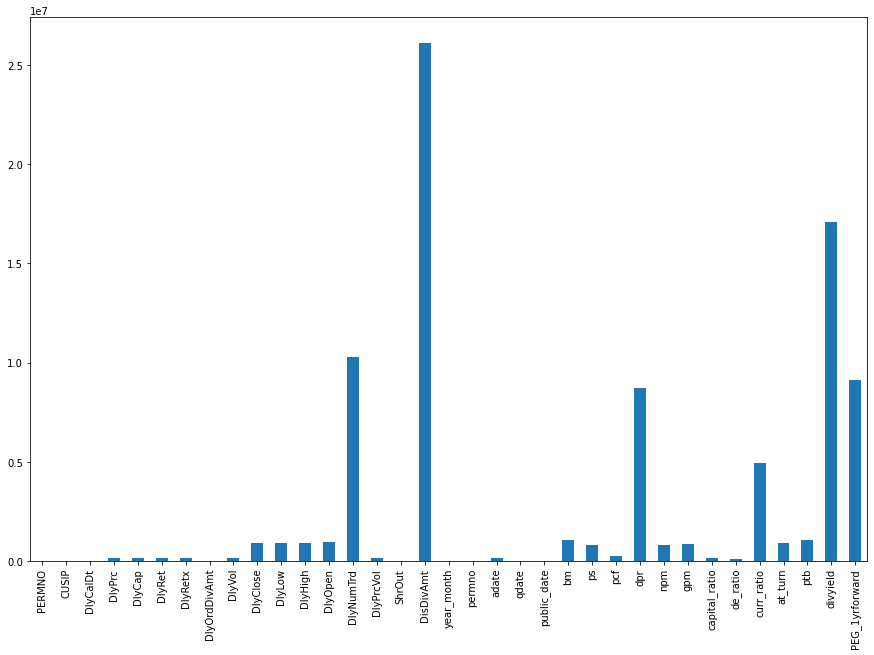

In [12]:
# data.isna().sum().plot(kind='bar')
fig, ax = plt.subplots(figsize=(15,10))
data.isna().sum().plot(kind='bar', ax=ax)
plt.show()

## further narrow down the data into S&P 500

In [13]:
df00=pd.read_csv("/Users/chenyuejiang/Desktop/Rstudio for Machine Lerning and Big Data/data set/SP500_Index_Constitutes2020.csv")
df00['ending'] = pd.to_datetime(df00['ending'])
df00['start'] = pd.to_datetime(df00['start'])
universe = df00['permno'].values

In [14]:
data1 = data[data['PERMNO'].isin(universe)]

In [15]:
data1.shape

(4157806, 35)

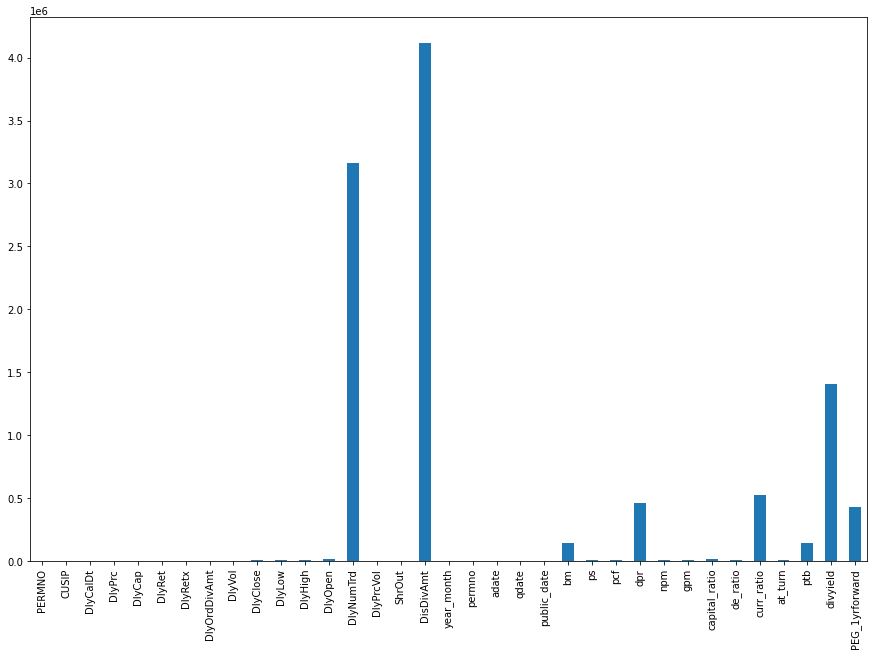

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
data1.isna().sum().plot(kind='bar', ax=ax)
plt.show()

# drop columns with top8 missing values

In [151]:
# drop columns with top8 missing values
col_to_drop = data1.isna().sum().sort_values(ascending=False).head(8).index
data2 = data1.drop(col_to_drop, axis=1)

In [152]:
data2.dropna(subset = ['DlyClose','DlyLow','DlyHigh','DlyOpen','capital_ratio'], inplace=True)

## use data2 as the start of the analysis

In [62]:
data2.columns

Index(['PERMNO', 'CUSIP', 'DlyCalDt', 'DlyPrc', 'DlyCap', 'DlyRet', 'DlyRetx',
       'DlyOrdDivAmt', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh', 'DlyOpen',
       'DlyPrcVol', 'ShrOut', 'year_month', 'permno', 'adate', 'qdate',
       'public_date', 'ps', 'pcf', 'npm', 'gpm', 'capital_ratio', 'de_ratio',
       'at_turn'],
      dtype='object')

In [153]:
# calculate the forward return
data2['fret5d'] = data2.groupby('PERMNO')['DlyRetx'].shift(-5)
data2['fret1d'] = data2.groupby('PERMNO')['DlyRetx'].shift(-1)

In [154]:
data2.rename(columns={'DlyCalDt':'date'}, inplace=True)
data2['date'] = pd.to_datetime(data2['date'])

In [155]:
data2.head()

,PERMNO,CUSIP,date,DlyPrc,DlyCap,DlyRet,DlyRetx,DlyOrdDivAmt,DlyVol,DlyClose,...,public_date,ps,pcf,npm,gpm,capital_ratio,de_ratio,at_turn,fret5d,fret1d
54916,10078,86681010,1999-01-04,90.0625,34697929.06,0.051825,0.051825,0.0,7658142.0,90.0625,...,1999-01-31,4.224,25.24,0.075,0.566,0.0,0.615,1.865,0.034388,0.027759
54917,10078,86681010,1999-01-05,92.5625,35661091.56,0.027759,0.027759,0.0,7760065.0,92.5625,...,1999-01-31,4.224,25.24,0.075,0.566,0.0,0.615,1.865,-0.006649,-0.017556
54918,10078,86681010,1999-01-06,90.9375,35035035.94,-0.017556,-0.017556,0.0,7835396.0,90.9375,...,1999-01-31,4.224,25.24,0.075,0.566,0.0,0.615,1.865,0.036814,-0.013746
54919,10078,86681010,1999-01-07,89.6875,34553454.69,-0.013746,-0.013746,0.0,8478294.0,89.6875,...,1999-01-31,4.224,25.24,0.075,0.566,0.0,0.615,1.865,-0.023886,0.013240
54920,10078,86681010,1999-01-08,90.8750,35010956.88,0.013240,0.013240,0.0,8125354.0,90.8750,...,1999-01-31,4.224,25.24,0.075,0.566,0.0,0.615,1.865,0.062831,0.034388


In [67]:
data2.set_index(['PERMNO','date'], inplace=True)

In [68]:
# def the MACD function
def MACD(df, n_fast, n_slow):
    groups = df.groupby('PERMNO')
    macds = []
    for name, group in groups:
        EMAfast = group['DlyClose'].ewm(span=n_fast, min_periods=n_slow).mean()
        EMAslow = group['DlyClose'].ewm(span=n_slow, min_periods=n_slow).mean()
        MACD = EMAfast - EMAslow
        MACDsign = MACD.ewm(span=9, min_periods=9).mean()
        MACDdiff = MACD - MACDsign
        group['MACD'] = MACD
        group['MACDsign'] = MACDsign
        group['MACDdiff'] = MACDdiff
        macds.append(group)
    result = pd.concat(macds)
    return result

# def the RSI function
def RSI(df, n):
    groups = df.groupby('PERMNO')
    rsis = []
    for name, group in groups:
        group['delta'] = group['DlyClose'] - group['DlyClose'].shift(1)
        group['gain'] = np.where(group['delta']>=0, group['delta'], 0)
        group['loss'] = np.where(group['delta']<0, abs(group['delta']), 0)
        avg_gain = []
        avg_loss = []
        gain = group['gain'].tolist()
        loss = group['loss'].tolist()
        for i in range(len(group)):
            if i < n:
                avg_gain.append(np.NaN)
                avg_loss.append(np.NaN)
            elif i == n:
                avg_gain.append(group['gain'].rolling(n).mean().tolist()[n])
                avg_loss.append(group['loss'].rolling(n).mean().tolist()[n])
            elif i > n:
                avg_gain.append(((n-1)*avg_gain[i-1] + gain[i])/n)
                avg_loss.append(((n-1)*avg_loss[i-1] + loss[i])/n)
        group['avg_gain'] = np.array(avg_gain)
        group['avg_loss'] = np.array(avg_loss)
        group['RS'] = group['avg_gain']/group['avg_loss']
        group['RSI'] = 100 - (100/(1+group['RS']))
        rsis.append(group)
    result = pd.concat(rsis)
    return result


In [157]:
data2 = MACD(data2, 12, 26)


In [158]:
data2 = RSI(data2, 14)

In [159]:
data2.reset_index(inplace=True)

In [160]:
data2.columns

Index(['index', 'PERMNO', 'CUSIP', 'date', 'DlyPrc', 'DlyCap', 'DlyRet',
       'DlyRetx', 'DlyOrdDivAmt', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh',
       'DlyOpen', 'DlyPrcVol', 'ShrOut', 'year_month', 'permno', 'adate',
       'qdate', 'public_date', 'ps', 'pcf', 'npm', 'gpm', 'capital_ratio',
       'de_ratio', 'at_turn', 'fret5d', 'fret1d', 'MACD', 'MACDsign',
       'MACDdiff', 'delta', 'gain', 'loss', 'avg_gain', 'avg_loss', 'RS',
       'RSI'],
      dtype='object')

In [281]:
features = ['DlyPrc', 'DlyCap',
       'DlyOrdDivAmt', 'DlyVol', 'DlyClose', 'DlyLow', 'DlyHigh', 'DlyOpen',
       'DlyPrcVol', 'ShrOut'
       , 'ps', 'pcf', 'npm', 'gpm', 'capital_ratio', 'de_ratio',
       'at_turn','MACD','RSI']

## import necessary packages

In [324]:
from scipy.stats.mstats import winsorize
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import MaxAbsScaler, PowerTransformer, MinMaxScaler, QuantileTransformer, RobustScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.base import clone, BaseEstimator, TransformerMixin
# import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
# import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# import svr
from sklearn.svm import SVR
# import xgboost regression
from xgboost import XGBRegressor
# import random search
from sklearn.model_selection import RandomizedSearchCV
# import MLPRegressor
from sklearn.neural_network import MLPRegressor
#  import grid search
from sklearn.model_selection import KFold, GridSearchCV

In [23]:

class Winsorize(BaseEstimator, TransformerMixin):
    feature_names = None
    level_winsorize = None
  # add another additional parameter, just for fun, while we are at it
    def __init__(self, feature_names = None, level_winsorize = 0.01):
#         print('\n>>>>>>>init() called.\n')
        self.feature_names = feature_names
        self.level_winsorize = level_winsorize
        self.abs_level_winsorize = {}

    def fit(self, X, y = None):
#         print('>>>>>>>fit() called.')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        self.feature_names = X_.columns if self.feature_names is None else self.feature_names
        for ft in self.feature_names:
            temp = winsorize(X_.loc[:,ft], limits=self.level_winsorize, nan_policy='omit').data
            self.abs_level_winsorize.update({ft:(np.nanmin(temp), np.nanmax(temp))})
            pass
        # print(f'level:{self.level_winsorize}\n')
        # print(f'abs levels: {self.abs_level_winsorize}\n')
        return self

    def transform(self, X, y = None):
#         print('\n>>>>>>>transform() called.\n')
        X_ = X.copy() # creating a copy to avoid changes to original dataset
        for ft in self.feature_names:
            if ft in X_.columns:
                lims = self.abs_level_winsorize[ft]
                tail_left = X_[ft]<=lims[0]
                tail_right = X_[ft]>=lims[1]
                X_.loc[tail_left, ft] = lims[0]
                X_.loc[tail_right, ft] = lims[1]
            else:
                print(f'Warning: {ft} not in the list of variables/ skipping')
            pass
        return X_

In [24]:
def parse_features(df, feature_names, level_winsorize):
    df = df.copy().dropna()
    for ft in feature_names:
        # winsorise
        df[ft] = winsorize(df[ft], limits=level_winsorize).data
    return df

In [347]:
class  ExcessReturnCalculator:
    rolling_frq = None
    df = None
    look_back_prm = None
    level_winsorize = None
    feature_names = None
    def __init__(self, 
                 df, 
                 rolling_frw,
                 look_back_prm,
                 level_winsorize,
                 configurations,
                 feature_names
                 ):
        
        self.rolling_frq = rolling_frw
        self.df = df
        self.look_back_prm = look_back_prm
        self.configurations=configurations
        self.level_winsorize = level_winsorize
        self.feature_names = feature_names
        self.optimal_weights = {}
        self.returns_strategy = {}
        self.pred_returns = {}
        for key in configurations.keys():
            self.optimal_weights[key] = self.df[['permno', 'date']].copy().set_index(['permno', 'date'])
            self.optimal_weights[key]['weight'] = 0
            self.returns_strategy[key] = self.df[['date']].copy().drop_duplicates().set_index(['date'])
            self.returns_strategy[key]['return'] = None
            self.returns_strategy[key].index = pd.to_datetime(self.returns_strategy[key].index)

    def make_prediction(self, df_out_sample, prm, model_type='non_linear'):
        df_pred = df_out_sample.copy()
        df_pred['pred'] = 0

        if model_type == 'linear':
            self.coefficients = {ft: prm_ft for ft, prm_ft in prm.items() if ft.lower() not in ['const', 'constant', 'intercept']}
            df_pred['pred'] = df_pred[self.coefficients.keys()].dot(list(self.coefficients.values())) + prm.get('const', 0)
        else:
            if not hasattr(self, 'variables'):
                self.variables = prm.get('variables', df_pred.columns)

            model = prm.get('model')
            if model is None:
                raise ValueError('Missing required parameter "model"')

            # Define a function to calculate predictions using the model
            def predict_func(row):
                return model.predict(row[self.variables].values.reshape(1, -1))[0]

            # Use pandas apply to apply the predict_func to each row of the dataframe
            df_pred['pred'] = df_pred.apply(predict_func, axis=1)

        return df_pred


    def get_n_days_rolling(self):
        if self.rolling_frq == '1M':
            return 30
        elif self.rolling_frq == '2M':
            return 2*30
        elif self.rolling_frq == '3M':
            return 3*30
        else:
            print('rolling_frq not supported: ' + self.rolling_frq)

    def parse_data(self, df_r, level_winsorize, feature_names):
        return parse_features(df_r, feature_names, level_winsorize)

    def alpha_estimation(self, df_r, alpha_estimation_method, label, feature_names):
        alpha_estimation_name = alpha_estimation_method['name']
        kwargs = alpha_estimation_method.get('kwargs', {})
        # if alpha_estimation_name == 'FrwdSelection':
        #     prm = self.estimate_forward_selection_method(df_r,label = label, feature_names=feature_names)
        if alpha_estimation_name == 'KNN':
            prm = self.estimate_knn_method(df_r, label = label, feature_names=feature_names, **kwargs)
        elif alpha_estimation_name == 'RandomForest':
            prm = self.estimate_rf_method(df_r, label = label, feature_names=feature_names, **kwargs)
        elif alpha_estimation_name == 'XGBoost':
            prm = self.estimate_xgb_method(df_r, label = label, feature_names=feature_names, **kwargs)
        elif alpha_estimation_name == 'MLP':
            prm = self.estimate_mlp_method(df_r, label = label, feature_names=feature_names, **kwargs)
        elif alpha_estimation_name == 'GridSearchCV':
            prm = self.estimate_grid_search_method(df_r, label = label, feature_names=feature_names, **kwargs)
        else:
            print('Method is not supported: ' + alpha_estimation_method )
            prm = None
        # print(f'{alpha_estimation_name} {kwargs} optimal parameters: {prm}')
        return prm, alpha_estimation_name

        

    def estimate_knn_method(self, df_r, label, feature_names, **kwargs):
        prm = {}
        prm['model'] = KNeighborsRegressor(**kwargs)
        prm['variables'] = feature_names
        prm['model'].fit(df_r[feature_names], df_r[label])
        return prm

    def estimate_rf_method(self, df_r, label, feature_names, **kwargs):
        prm = {}
        prm['model'] = RandomForestRegressor(**kwargs)
        prm['variables'] = feature_names
        prm['model'].fit(df_r[feature_names], df_r[label])
        return prm
    
    
    
    def estimate_xgb_method(self, df_r, label, feature_names, **kwargs):
        prm = {}
        prm['model'] = XGBRegressor(**kwargs)
        prm['variables'] = feature_names
        prm['model'].fit(df_r[feature_names], df_r[label])
        return prm
    
    def estimate_mlp_method(self, df_r, label, feature_names, **kwargs):
        prm = {}
        prm['model'] = MLPRegressor(**kwargs)
        prm['variables'] = feature_names
        prm['model'].fit(df_r[feature_names], df_r[label])
        return prm
    



    def estimate_grid_search_method(self, df_r, label, feature_names, **kwargs):
        prm = {}
        estimator = kwargs.get('estimator',XGBRegressor())
        param_grid = kwargs.get('param_grid', {
        'n_estimators': [50,100,200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5]})
        prm['model'] = RandomizedSearchCV(estimator=estimator, param_distributions=param_grid,n_iter=10, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
        prm['variables'] = feature_names
        prm['model'].fit(df_r[feature_names], df_r[label])
        print(prm)
        return prm
    

    # def calculate_excess_return(self,df_r,df_out_sample,label):
    #     """
    #     Calculate excess return:
    #     excess return = expected return - realized return
    #     This is used when excess return is the benchmark"""
    #     # ret = pd.pivot_table(df_r, values=label, index=['date'], columns = ['permno'])
    #     # ret = ret.fillna(0.0)

    #     expret = pd.pivot_table(df_out_sample, values='pred', index=['date'], columns = ['permno'])
    #     expret = expret.fillna(0.0)
    #     expret = expret.iloc[0]
    #     # print(expret)

    #     realized_ret = pd.pivot_table(df_out_sample,values='fwd1d_ret', index=['date'], columns = ['permno'])
    #     realized_ret.index = pd.to_datetime(realized_ret.index)
    #     realized_ret.fillna(0.0, inplace=True)
    #     realized_ret = realized_ret.iloc[0]
    #     # print(realized_ret)
        

    #     excess_return = expret - realized_ret
    #     return excess_return
    #     # print(excess_return)
        



    def run_backtest(self):
        pred_returns = {}
        print('running backtest...')
        
        return_dict = {}
        name_to_append = []
        start_date = self.df['date'].min() + pd.Timedelta(days=self.look_back_prm)
        end_date = self.df['date'].max() - pd.Timedelta(days=self.get_n_days_rolling() + 1)

    # Create a tqdm object to display the progress bar
        tqdm_iterator = tqdm(pd.date_range(start=start_date, end=end_date, freq=self.rolling_frq))

        for dt in tqdm_iterator:
            return_dict[dt] = {}
            print('for date: ' + str(dt))
            for cfg_name, cfg in self.configurations.items():
                # print('processing configuration: ' + cfg_name)
                
                #############################################
                ### ASSIGN CONFIGURATION PARAMETERS #########
                last_day_shift = cfg.get('last_day_shift', 5)
                label = cfg.get('label', 'fret5d')
                features = cfg.get('features', None)
                alpha_estimation_method = cfg['alpha_estimation_method']
                parsing_pipe = cfg.get('parsing',None)
                
                #############################################
                if features is None: 
                    print(f'No features specified for {cfg_name}')
                    break
                
                # step0
                df = self.df.copy()
               
                # step1: restrict dataset to insample
                ######
                  #please note the change to the first version - we shifted the dates by 5 days to avoid look ahead bias
                #####
                # print('step1: restrict dataset to insample')
                df_r = df.loc[np.logical_and(
                    df['date'] >= dt - pd.Timedelta(days=self.look_back_prm), 
                    df['date'] < dt - pd.Timedelta(days = last_day_shift)), :].copy()
                
                print('       insample period, start date: ' + 
                       str(df_r['date'].min()) + 
                       ' end date = ' + 
                       str(df_r['date'].max()))

                # step2: prepare data - filter out outlier, normalise, winsorise, cox-box trasnform
                # print('step2: prepare data in-sample')
                if parsing_pipe is not None: 
                    df_r[features] = parsing_pipe.fit_transform(df_r[features])
                    df_r.dropna(inplace=True)
                else:
                    df_r = self.parse_data(df_r, self.level_winsorize,self.feature_names)

                # step3: run alpha estimation method
                # print(f'step3: run alpha estimation method: {alpha_estimation_method}')
                prm,alpha_estimation_name = self.alpha_estimation(df_r, 
                                            alpha_estimation_method=alpha_estimation_method, 
                                            label=label, 
                                            feature_names = features)
                print(f'alpha estimation method: {alpha_estimation_name}')
                # step4: set out of sample period 
                # print('step4: set out of sample period')
                sel = np.logical_and(
                    df['date'] >= dt, 
                    df['date'] < dt + pd.Timedelta(days=self.get_n_days_rolling()))
                if sum(sel)==0:
                    continue
                    
                df_out_sample = df.loc[sel, :].copy()
                
                print('       out of sample period, start date: ' + 
                      str(df_out_sample['date'].min()) + 
                      ' end date = ' + 
                      str(df_out_sample['date'].max()))
                #step5: prepare out of sample data
                # print('step5: prepare out of data (only factors!)')
                if parsing_pipe is not None:
                    df_out_sample[features] = parsing_pipe.transform(df_out_sample[features])
                    df_out_sample.dropna(inplace=True)
                else: 
                    df_out_sample = self.parse_data(df_out_sample, self.level_winsorize)
                 
                # step6: make prediction for out of sample
                print('step6: make prediction for out of sample')
                df_pred = self.make_prediction(df_out_sample, prm)
                df_pred[f'pred_{alpha_estimation_name}']= 0
                df_pred[f'pred_{alpha_estimation_name}'] = df_pred['pred']
                
                # step7: calculate excess return
                print('step7: calculate return')
                return_dict[dt][f'{alpha_estimation_name}']= df_pred[['permno','date',f'pred_{alpha_estimation_name}']]
                # print(return_dict[dt][f'{alpha_estimation_name}'].head())
            print(return_dict[dt].keys())
            
            
        return return_dict


In [162]:
data2.rename(columns={'DlyCalDt':'date'}, inplace=True)
data2['date'] = pd.to_datetime(data2['date'])

In [ ]:
model = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 2],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}
data3 = data2[features + ['date', 'permno', 'fret5d']]
data3.dropna(inplace=True)
random_model = RandomizedSearchCV(model, param_grid, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3, random_state=1001)
random_model.fit(data3[features], data3['fret5d'])
print(random_model.best_score_)


In [344]:
random_model.best_score_

-0.0007530615009963334

In [368]:
# set the random seed
# RMCVmodel = MLPRegressor()
np.random.seed(42)
pipept = Pipeline([('ws',Winsorize(level_winsorize = 0.05)),
                ('qt',PowerTransformer()),
                ('maxabs',MaxAbsScaler())])
configurations = {
                #   'KNN': {
                #           'alpha_estimation_method':{'name':'KNN', 'n_neighbors':5, 'weights':'distance'},
                #           'label':'fret5d',
                #           'last_day_shift':5, 
                #           'features': features,
                #           'parsing':clone(pipept)},
                #  'RF':{
                #           'alpha_estimation_method':{'name':'RandomForest', 'n_estimators':100, 'max_depth':5},
                #           'label':'fret5d',
                #           'last_day_shift':5, 
                #           'features': features,
                #           'parsing':clone(pipept)},
                
                # 'XGBoost':{
                #         'alpha_estimation_method':{'name':'XGBoost', 'n_estimators':100, 'max_depth':5, 'learning_rate':0.1},
                #         'label':'fret5d',
                #         'last_day_shift':5,
                #         'features': features,
                #         'parsing':clone(pipept)},
                # 'MLP':{'alpha_estimation_method':{'name':'MLP', 'hidden_layer_sizes':(100,100,100), 'activation':'relu', 'solver':'adam', 'alpha':0.0001},
                #         'label':'fret5d',
                #         'last_day_shift':5,
                #         'features': features,
                #         'parsing':clone(pipept)},
                'GridSearch':{'alpha_estimation_method':{'name':'GridSearchCV'},
                        'label':'fret5d',
                        'last_day_shift':5,
                        'features': features,
                        'parsing':clone(pipept)}

}

er = ExcessReturnCalculator(df = data2[data2['date']<'2005-01-01'],rolling_frw = '1M', 
        look_back_prm = 2*365, 
        level_winsorize = 0.01, 
        feature_names=features,configurations=configurations)
return_dict = er.run_backtest()

running backtest...


  0%|          | 0/47 [00:00<?, ?it/s]

for date: 2001-01-31 00:00:00
       insample period, start date: 1999-02-01 00:00:00 end date = 2001-01-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                        

  2%|▏         | 1/47 [04:24<3:22:42, 264.40s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-02-28 00:00:00
       insample period, start date: 1999-03-01 00:00:00 end date = 2001-02-22 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

  4%|▍         | 2/47 [09:08<3:27:05, 276.13s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-03-31 00:00:00
       insample period, start date: 1999-04-01 00:00:00 end date = 2001-03-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

  6%|▋         | 3/47 [14:41<3:41:20, 301.83s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-04-30 00:00:00
       insample period, start date: 1999-05-03 00:00:00 end date = 2001-04-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

  9%|▊         | 4/47 [21:12<4:01:44, 337.31s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-05-31 00:00:00
       insample period, start date: 1999-06-01 00:00:00 end date = 2001-05-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 11%|█         | 5/47 [25:00<3:28:32, 297.93s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-06-30 00:00:00
       insample period, start date: 1999-07-01 00:00:00 end date = 2001-06-22 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 13%|█▎        | 6/47 [29:04<3:11:02, 279.56s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-07-31 00:00:00
       insample period, start date: 1999-08-02 00:00:00 end date = 2001-07-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 15%|█▍        | 7/47 [34:00<3:09:55, 284.88s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-08-31 00:00:00
       insample period, start date: 1999-09-01 00:00:00 end date = 2001-08-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 17%|█▋        | 8/47 [36:38<2:38:58, 244.58s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-09-30 00:00:00
       insample period, start date: 1999-10-01 00:00:00 end date = 2001-09-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 19%|█▉        | 9/47 [40:35<2:33:24, 242.21s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-10-31 00:00:00
       insample period, start date: 1999-11-01 00:00:00 end date = 2001-10-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 21%|██▏       | 10/47 [43:15<2:13:34, 216.61s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-11-30 00:00:00
       insample period, start date: 1999-12-01 00:00:00 end date = 2001-11-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 23%|██▎       | 11/47 [47:12<2:13:50, 223.07s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2001-12-31 00:00:00
       insample period, start date: 2000-01-03 00:00:00 end date = 2001-12-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 26%|██▌       | 12/47 [51:29<2:16:04, 233.28s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-01-31 00:00:00
       insample period, start date: 2000-02-01 00:00:00 end date = 2002-01-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 28%|██▊       | 13/47 [57:10<2:30:43, 266.00s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-02-28 00:00:00
       insample period, start date: 2000-02-29 00:00:00 end date = 2002-02-22 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 30%|██▉       | 14/47 [1:00:03<2:10:48, 237.82s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-03-31 00:00:00
       insample period, start date: 2000-03-31 00:00:00 end date = 2002-03-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 32%|███▏      | 15/47 [1:05:19<2:19:21, 261.30s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-04-30 00:00:00
       insample period, start date: 2000-05-01 00:00:00 end date = 2002-04-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 34%|███▍      | 16/47 [1:08:42<2:06:02, 243.95s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-05-31 00:00:00
       insample period, start date: 2000-05-31 00:00:00 end date = 2002-05-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 36%|███▌      | 17/47 [1:11:57<1:54:32, 229.08s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-06-30 00:00:00
       insample period, start date: 2000-06-30 00:00:00 end date = 2002-06-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 38%|███▊      | 18/47 [1:16:22<1:55:55, 239.84s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-07-31 00:00:00
       insample period, start date: 2000-07-31 00:00:00 end date = 2002-07-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 40%|████      | 19/47 [1:20:41<1:54:34, 245.53s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-08-31 00:00:00
       insample period, start date: 2000-08-31 00:00:00 end date = 2002-08-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 43%|████▎     | 20/47 [1:26:25<2:03:52, 275.29s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-09-30 00:00:00
       insample period, start date: 2000-10-02 00:00:00 end date = 2002-09-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 45%|████▍     | 21/47 [1:31:17<2:01:24, 280.17s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-10-31 00:00:00
       insample period, start date: 2000-10-31 00:00:00 end date = 2002-10-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 47%|████▋     | 22/47 [1:35:09<1:50:44, 265.76s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-11-30 00:00:00
       insample period, start date: 2000-11-30 00:00:00 end date = 2002-11-22 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 49%|████▉     | 23/47 [1:39:44<1:47:28, 268.67s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2002-12-31 00:00:00
       insample period, start date: 2001-01-02 00:00:00 end date = 2002-12-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 51%|█████     | 24/47 [1:44:01<1:41:35, 265.03s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-01-31 00:00:00
       insample period, start date: 2001-01-31 00:00:00 end date = 2003-01-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 53%|█████▎    | 25/47 [1:47:56<1:33:50, 255.94s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-02-28 00:00:00
       insample period, start date: 2001-02-28 00:00:00 end date = 2003-02-21 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 55%|█████▌    | 26/47 [1:52:17<1:30:09, 257.60s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-03-31 00:00:00
       insample period, start date: 2001-04-02 00:00:00 end date = 2003-03-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 57%|█████▋    | 27/47 [1:59:09<1:41:16, 303.81s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-04-30 00:00:00
       insample period, start date: 2001-04-30 00:00:00 end date = 2003-04-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 60%|█████▉    | 28/47 [2:05:01<1:40:46, 318.24s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-05-31 00:00:00
       insample period, start date: 2001-05-31 00:00:00 end date = 2003-05-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 62%|██████▏   | 29/47 [2:09:52<1:33:04, 310.27s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-06-30 00:00:00
       insample period, start date: 2001-07-02 00:00:00 end date = 2003-06-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 64%|██████▍   | 30/47 [2:15:57<1:32:30, 326.49s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-07-31 00:00:00
       insample period, start date: 2001-07-31 00:00:00 end date = 2003-07-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 66%|██████▌   | 31/47 [2:19:45<1:19:12, 297.06s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-08-31 00:00:00
       insample period, start date: 2001-08-31 00:00:00 end date = 2003-08-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 68%|██████▊   | 32/47 [2:24:12<1:12:01, 288.07s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-09-30 00:00:00
       insample period, start date: 2001-10-01 00:00:00 end date = 2003-09-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 70%|███████   | 33/47 [2:28:22<1:04:30, 276.48s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-10-31 00:00:00
       insample period, start date: 2001-10-31 00:00:00 end date = 2003-10-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 72%|███████▏  | 34/47 [2:31:21<53:33, 247.19s/it]  

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-11-30 00:00:00
       insample period, start date: 2001-11-30 00:00:00 end date = 2003-11-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 74%|███████▍  | 35/47 [2:35:18<48:52, 244.35s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2003-12-31 00:00:00
       insample period, start date: 2001-12-31 00:00:00 end date = 2003-12-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 77%|███████▋  | 36/47 [2:37:51<39:45, 216.90s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-01-31 00:00:00
       insample period, start date: 2002-01-31 00:00:00 end date = 2004-01-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 79%|███████▊  | 37/47 [2:41:09<35:12, 211.24s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-02-29 00:00:00
       insample period, start date: 2002-03-01 00:00:00 end date = 2004-02-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 81%|████████  | 38/47 [2:44:26<31:01, 206.81s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-03-31 00:00:00
       insample period, start date: 2002-04-01 00:00:00 end date = 2004-03-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 83%|████████▎ | 39/47 [2:46:59<25:25, 190.73s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-04-30 00:00:00
       insample period, start date: 2002-05-01 00:00:00 end date = 2004-04-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 85%|████████▌ | 40/47 [2:51:19<24:41, 211.59s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-05-31 00:00:00
       insample period, start date: 2002-06-03 00:00:00 end date = 2004-05-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 87%|████████▋ | 41/47 [2:55:38<22:33, 225.66s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-06-30 00:00:00
       insample period, start date: 2002-07-01 00:00:00 end date = 2004-06-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 89%|████████▉ | 42/47 [2:59:53<19:33, 234.69s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-07-31 00:00:00
       insample period, start date: 2002-08-01 00:00:00 end date = 2004-07-23 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 91%|█████████▏| 43/47 [3:05:00<17:04, 256.18s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-08-31 00:00:00
       insample period, start date: 2002-09-03 00:00:00 end date = 2004-08-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 94%|█████████▎| 44/47 [3:09:13<12:45, 255.23s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-09-30 00:00:00
       insample period, start date: 2002-10-01 00:00:00 end date = 2004-09-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 96%|█████████▌| 45/47 [3:14:07<08:53, 266.95s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-10-31 00:00:00
       insample period, start date: 2002-11-01 00:00:00 end date = 2004-10-25 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

 98%|█████████▊| 46/47 [3:16:46<03:54, 234.61s/it]

step7: calculate return
dict_keys(['GridSearchCV'])
for date: 2004-11-30 00:00:00
       insample period, start date: 2002-12-02 00:00:00 end date = 2004-11-24 00:00:00
{'model': RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constr

100%|██████████| 47/47 [3:20:44<00:00, 256.27s/it]

step7: calculate return
dict_keys(['GridSearchCV'])


In [237]:
# result = {}
# for i in return_dict.keys():
#     result[i] = pd.concat([return_dict[i]['KNN'],return_dict[i]['RandomForest'],return_dict[i]['XGBoost'],return_dict[i]['MLP']],axis=1)
#     result[i] = result[i].loc[:,~result[i].columns.duplicated()]

In [354]:
return_dict[list(return_dict.keys())[0]]['GridSearchCV'].head()

,permno,date,pred_GridSearchCV
524,10078,2001-01-31,0.001252
525,10078,2001-02-01,0.001036
526,10078,2001-02-02,0.001036
527,10078,2001-02-05,0.001036
528,10078,2001-02-06,0.001036


In [369]:
result_randomSearch ={}
for i in return_dict.keys():
    result_randomSearch[i] = return_dict[i]['GridSearchCV']
    result_randomSearch[i] = result_randomSearch[i].loc[:,~result_randomSearch[i].columns.duplicated()]

In [370]:
result_randomSearch = pd.concat(result_randomSearch).reset_index()

In [374]:
result_randomSearch.shape

(737158, 5)

In [28]:
def get_portfolio(df,percent_of_rank,pred_method):
    """
This function takes the return dict and the percent of rank as input and returns the portfolio dataframe"""
# generate pivot table
    pivot_table = pd.pivot_table(df, values=pred_method, index=['date'], columns = ['permno'])
# rank by the cumulative return
    cum_return = pivot_table.cumsum(axis=0)
    ranked_df = cum_return.rank(axis=1, method='first', na_option='bottom')
    bottom_10 = ranked_df[ranked_df>(1-percent_of_rank)*ranked_df.shape[1]].dropna(how='all')
    top_10 = ranked_df[ranked_df<percent_of_rank*ranked_df.shape[1]].dropna(how='all')
    top10 = top_10.stack().reset_index()
    bottom10 = bottom_10.stack().reset_index()
    portfolio = pd.concat([top10,bottom10],axis=0)
    portfolio['long_short'] = portfolio[0].apply(lambda x: 1 if x<percent_of_rank*ranked_df.shape[1] else -1)
    portfolio.drop(columns=[0],inplace=True)
    return portfolio



In [371]:
portfolio_randomSearch = get_portfolio(result_randomSearch,0.1,'pred_GridSearchCV')

In [375]:
def plot_portfolio_return(df_portfolio, df_data, return_result):
    """
    This function takes the portfolio dataframe and the data dataframe as input and returns the plot of portfolio return"""
    temp = df_data[['date','PERMNO','fret5d']].merge(df_portfolio, left_on=['date','PERMNO'],right_on= ['date','permno'] ,how='right')
    temp['return'] = temp['fret5d']*temp['long_short']
    #  resample every three months and cumsum
    temp = temp.groupby(pd.Grouper(key='date',freq='1M')).sum()
    temp['return'].plot()
    plt.legend(title = f'{return_result}')
    # plt.show()
    if return_result:
        return temp
    else :
        return None


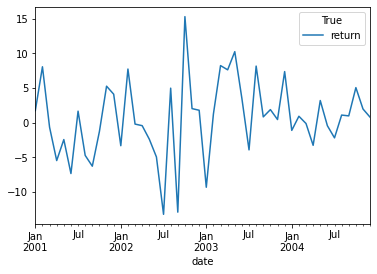

In [376]:
temp = plot_portfolio_return(portfolio_randomSearch, data2, True)

In [381]:
def print_result(df0):
    # print sharpe ratio
    df = df0.groupby('date')['return'].sum()
    print('volatility is: ', df.std()*np.sqrt(252))
    print('sharpe ratio is: ', df.mean()/df.std()*np.sqrt(252))
    # print max drawdown
    print('max drawdown is: ', (df/df.cummax()-1).min(), 'on ' , (df/df.cummax()-1).idxmin())
    # print skewness
    print('skewness is: ', df.skew())
    # print kurtosis
    print('kurtosis is: ', df.kurtosis())
    fig, ax = plt.subplots(2,2,figsize=(15,10))
    # plot the histogram
    df.hist(bins=30,ax=ax[0,0])
    ax[0,0].set_title('histogram')
    # plot the qq plot
    sm.qqplot(df, line='s',ax=ax[0,1])
    ax[0,1].set_title('qq plot')
    # plot the density plot
    df.plot(kind='density',ax=ax[1,0])
    ax[1,0].set_title('density plot')
    # plot the best fit normal distribution
    x = np.linspace(df.min(), df.max(), 100)
    pdf = norm.pdf(x, df.mean(), df.std())
    ax[1,0].plot(x, pdf, 'k', linewidth=2)
    ax[1,0].set_title('best fit normal distribution')
    # plot the violin plot
    sns.violinplot(df,ax=ax[1,1])
    plt.show()



volatility is:  89.61027254842034
sharpe ratio is:  1.7161306106607854
max drawdown is:  -2.6467022557228645 on  2002-07-31 00:00:00
skewness is:  -0.14104938072086431
kurtosis is:  0.7330260574966241


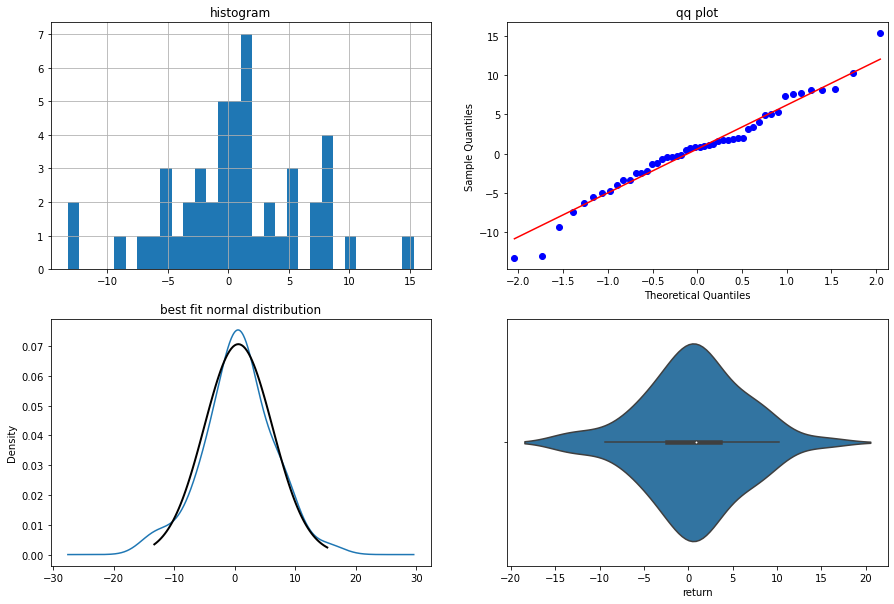

In [382]:
print_result(temp)

volatility is:  133.15969432203596
sharpe ratio is:  5.64169303671158
max drawdown is:  -7.648453298437753 on  2001-10-31 00:00:00
skewness is:  -0.15735590592336993
kurtosis is:  1.1584820293471547


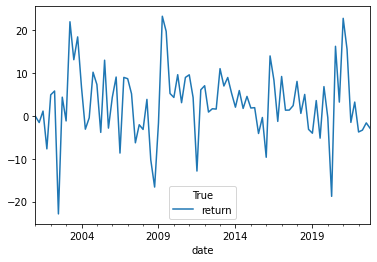

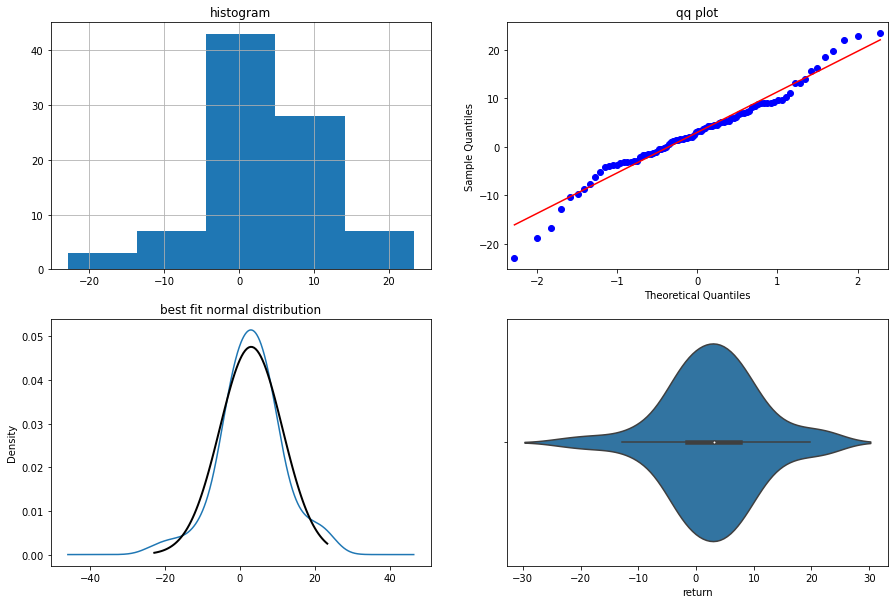

volatility is:  135.676166851359
sharpe ratio is:  4.672857459952188
max drawdown is:  -3.7894486387915634 on  2002-07-31 00:00:00
skewness is:  -0.6336184835099048
kurtosis is:  1.850631735207656


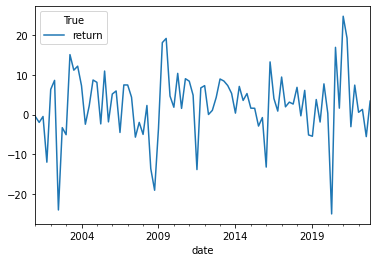

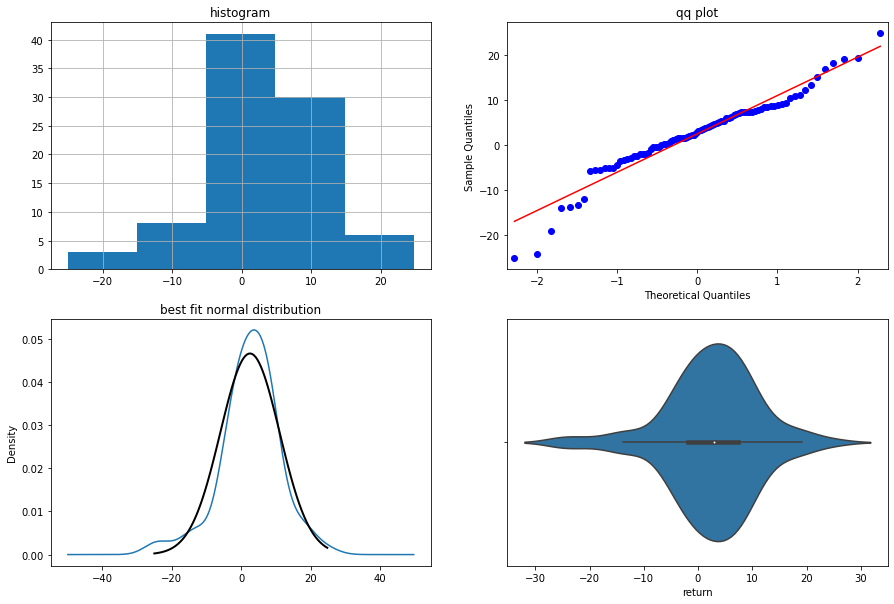

volatility is:  146.0752235617066
sharpe ratio is:  4.29114012404543
max drawdown is:  -7.008079034399647 on  2002-07-31 00:00:00
skewness is:  -0.6207218489191877
kurtosis is:  2.262636077000837


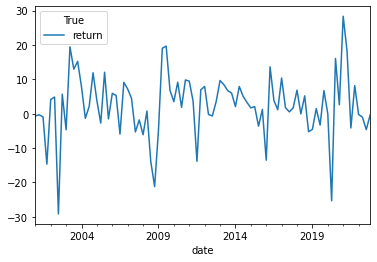

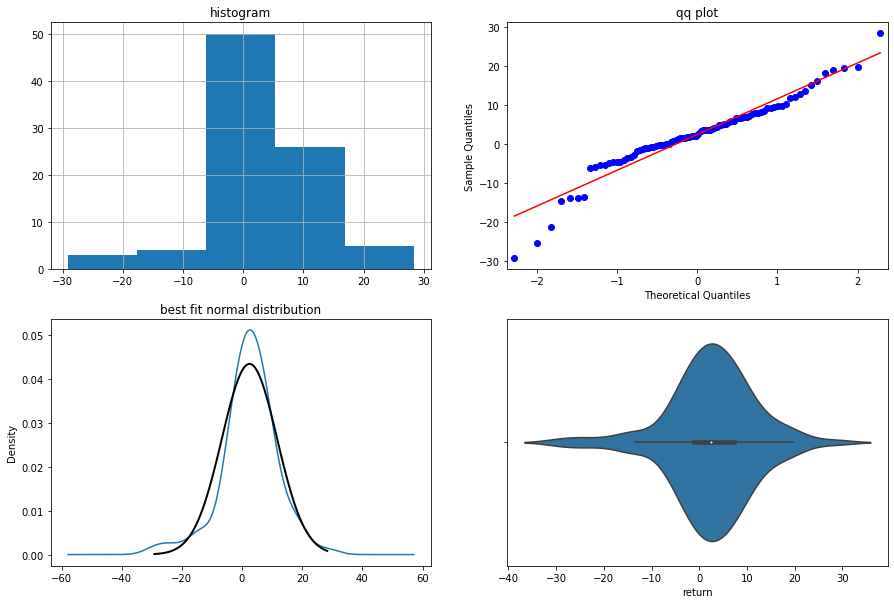

volatility is:  136.65186791892316
sharpe ratio is:  5.224275938021668
max drawdown is:  -39.28189707105055 on  2001-10-31 00:00:00
skewness is:  -0.24890472408634953
kurtosis is:  2.3967583109355304


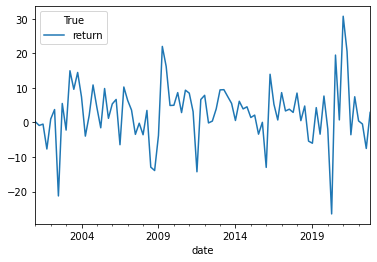

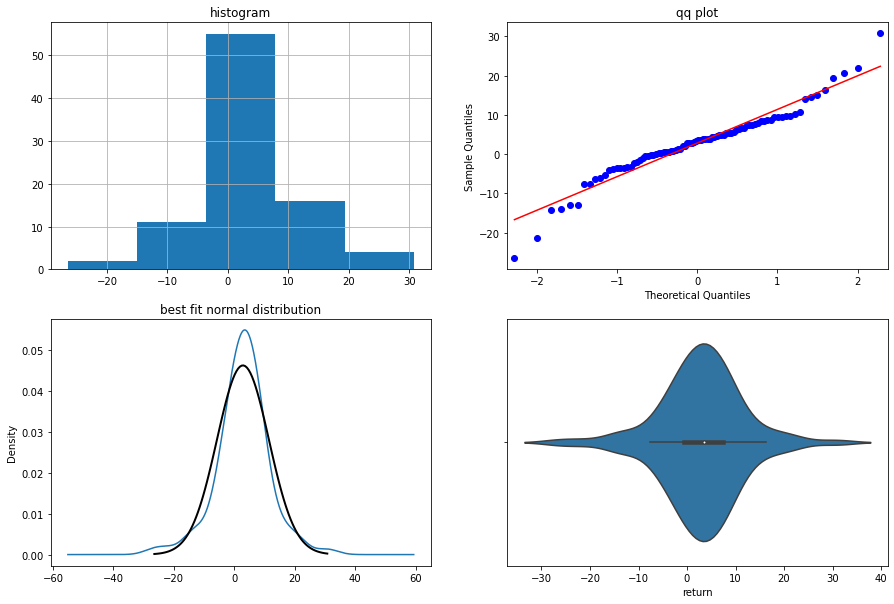

In [257]:
# for col in result.columns: 
#     if col.startswith('pred_'):
#         portfolio = get_portfolio(result,0.1,col)
#         temp = plot_portfolio_return(portfolio,data2,True) 
#         print_result(temp)     
#     else:
#         continue
# plt.show()